In [ ]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425345 sha256=bcffdfaabea3694ed59a872129aeef714017b14e00fac78608a0e534e9605d10
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


In [ ]:
!pip install pandas.plotting

ERROR: Could not find a version that satisfies the requirement pandas.plotting (from versions: none)
ERROR: No matching distribution found for pandas.plotting


In [ ]:
from pyspark.ml import Pipeline
from pyspark.sql.functions import col, when


In [ ]:
import pyspark
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession, SQLContext
spark = SparkSession.Builder().appName("Project_DDAM_parquet").getOrCreate()

In [ ]:
sqlCtx= SQLContext(spark)

/usr/local/lib/python3.10/dist-packages/pyspark/sql/context.py:113: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=spark.read.format("parquet").option("header", True).option("inferSchema", True).load("/content/drive/MyDrive/DDAM project/Combined_Flights_2018.parquet")

In [ ]:
df.select(df.columns[:5]).show()

+-------------------+-----------------+------+----+---------+
|         FlightDate|          Airline|Origin|Dest|Cancelled|
+-------------------+-----------------+------+----+---------+
|2018-01-23 00:00:00|Endeavor Air Inc.|   ABY| ATL|    false|
|2018-01-24 00:00:00|Endeavor Air Inc.|   ABY| ATL|    false|
|2018-01-25 00:00:00|Endeavor Air Inc.|   ABY| ATL|    false|
|2018-01-26 00:00:00|Endeavor Air Inc.|   ABY| ATL|    false|
|2018-01-27 00:00:00|Endeavor Air Inc.|   ABY| ATL|    false|
|2018-01-28 00:00:00|Endeavor Air Inc.|   ABY| ATL|    false|
|2018-01-29 00:00:00|Endeavor Air Inc.|   ABY| ATL|    false|
|2018-01-30 00:00:00|Endeavor Air Inc.|   ABY| ATL|    false|
|2018-01-31 00:00:00|Endeavor Air Inc.|   ABY| ATL|    false|
|2018-01-03 00:00:00|Endeavor Air Inc.|   ATL| ABY|    false|
|2018-01-04 00:00:00|Endeavor Air Inc.|   ATL| ABY|    false|
|2018-01-05 00:00:00|Endeavor Air Inc.|   ATL| ABY|    false|
|2018-01-06 00:00:00|Endeavor Air Inc.|   ATL| ABY|    false|
|2018-01

In [ ]:
df.count()

5689512

# since DepDelay and DepDelay minutes are quite the same, we decide to drop DepDelayMinutes. DepDelayMinutes show 0 if there is a Difference in minutes between scheduled and actual departure time  but the outcome will be 0. Instead, DepDelay shows a negative number in case of the aircraft departs before the scheduling time.

 - IATA_Code_Marketing_Airline will be dropped since we can't be sure that this id is unique in time.
 - Flight_Number_Marketing_Airline WE DON'T DROP it since the id of flight seems to be the same over the same (not unique code over different flight)
 - we noticed the presence of a pattern like a columns starting with the string "IATA". "IATA" is a code of identification given by a proper institution in America. Since we read that the id might not be unique, we decide to drop every "IATA" COLUMNS
 - The three columns "Originally_schedule_code_share_airline" appears to be composed of error. We delete it.
 - for the operating airline id, we follow the same strategy of Marketing airline id;
 - AirportID is unique in a specific time, AirportSeqID may changes over time so we decide to drop this latter;
 - we drop originWac,OriginState, OriginStateFips identify the same thing, a state, so we decided to drop it and maintain OriginCirynAME, originStateName
 - we follow the same strategy for the destination as above
 - **DepTimeBlk** seems redundant, this attributes is not relevant for the analysis that we want to do since also we have the departure time. We maintain it for an explorative analysis, but we believe that we will drop it
 - **TaxiOut**, explorative task, droppable
 - [**WheelOn** and **Wheeloff** have to be analyzed better, interesting.]
 - We don't know the meaning, we have dropped it
 - **ArrTimeBlk** seems redundant, this attributes is not relevant for the analysis that we want to do since also we have the departure time. We maintain it for an explorative analysis, but we believe that we will drop it

___________________________________________


- A **NETWORK** seems to be a group, a cluster of operating airlines. Since this, we decide to maintain both for further analysis
- **TAIL NUMBER** stand for the code afferent to a specific plane. We maintain it in order to be able to understand if a specific plane are much late ort not
- we drop originWac,OriginState, OriginStateFips identify the same thing, a state, so we decided to drop it and maintain OriginCirynAME, originStateName
- We maintain CRSDepTime and DepTime in order to make an explorative task before the dropping. We believe that it might be useful in order to understant if there is same operating airline which leave in delay or in advance
- **DepDe115**
- **Diverted**
- **CRSElapsedTime** and **ActualElapsedTime** are maintained for explorative analysis
- **DivAirportLandings** contiene "None" value. Capire che vuol dire

____________________

 **PROBLEM**

- Flights
- CarrierDelay
- WeatherDelay
- NASDelay
- SecurityDelay
- LateAircraftDelay
- FirstDepTime
- LongestAddGTime
- DivReachedDest
- DivActualElapsedTime
- DivArrDelay
- DivDistance
- Div1Airport
- Div1AirportID
- Div1AirportSeqID
- Div1WheelsOn
- Div1TailNum
- Div2Airport
- Div2AirportID
- Div2AirportSeqID
- Div2WheelsOn
- Div2TotalGTime
- Div2LongestGTime
- Div2LongestGTime
- Div2WheelsOff

In [ ]:
df=df.drop( "Quarter", "DepDelayMinutes", "Year","DOT_ID_Marketing_Airline", "IATA_Code_Marketing_Airline")

In [ ]:
df=df.drop("Originally_Scheduled_Code_Share_Airline", "DOT_ID_Originally_Scheduled_Code_Share_Airline","IATA_Code_Originally_Scheduled_Code_Share_Airline", "Flight_Num_Originally_Scheduled_Code_Share_Airline", "DOT_ID_Operating_Airline" )

In [ ]:
df=df.drop("OriginAirportSeqID","OriginWac","OriginState","OriginStateFips", "DestAirportSeqID","OriginCityMarketID","DestCityMarketID" )

In [ ]:
df=df.drop("DestWac", "DestStateFips","DestState", "TaxiOut", "TaxiIn","ArrDelayMinutes", "Div2WheelsOff")

In [ ]:
from pyspark.sql.functions import col
pattern_regex = "^IATA"

# Seleziona le colonne che corrispondono al pattern
colonne_iata = [col(colonna) for colonna in df.columns if colonna.startswith("IATA")]

# Crea un nuovo DataFrame con le colonne selezionate
df_iata = df.select(*colonne_iata)

# Stampa il nuovo DataFrame
print("Contenuto del DataFrame con colonne 'IATA':")
df_iata.show()

df = df.drop(*colonne_iata)
df.show()

Contenuto del DataFrame con colonne 'IATA':
+---------------------------+
|IATA_Code_Operating_Airline|
+---------------------------+
|                         9E|
|                         9E|
|                         9E|
|                         9E|
|                         9E|
|                         9E|
|                         9E|
|                         9E|
|                         9E|
|                         9E|
|                         9E|
|                         9E|
|                         9E|
|                         9E|
|                         9E|
|                         9E|
|                         9E|
|                         9E|
|                         9E|
|                         9E|
+---------------------------+
only showing top 20 rows

+-------------------+-----------------+------+----+---------+--------+----------+-------+--------+-------+-------+--------------+-----------------+--------+-----+----------+---------+-------------------------+-

In [ ]:
#summary2=df.describe().toPandas()
#summary2

## MISSING VALUES

Colonne Categoriche

In [ ]:
non_num_cols = [item[0] for item in df.dtypes if item[1] == 'string']
print('Le colonne non numeriche sono')
print(non_num_cols)

Le colonne non numeriche sono
['Airline', 'Origin', 'Dest', 'Marketing_Airline_Network', 'Operated_or_Branded_Code_Share_Partners', 'Operating_Airline', 'Tail_Number', 'OriginCityName', 'OriginStateName', 'DestCityName', 'DestStateName', 'DepTimeBlk', 'ArrTimeBlk']


Colonne numeriche

In [ ]:
num_cols = [item[0] for item in df.dtypes if item[1] != 'string']
print('Le colonne numeriche sono')
print(num_cols)

Le colonne numeriche sono
['FlightDate', 'Cancelled', 'Diverted', 'CRSDepTime', 'DepTime', 'DepDelay', 'ArrTime', 'AirTime', 'CRSElapsedTime', 'ActualElapsedTime', 'Distance', 'Month', 'DayofMonth', 'DayOfWeek', 'Flight_Number_Marketing_Airline', 'Flight_Number_Operating_Airline', 'OriginAirportID', 'DestAirportID', 'DepDel15', 'DepartureDelayGroups', 'WheelsOff', 'WheelsOn', 'CRSArrTime', 'ArrDelay', 'ArrDel15', 'ArrivalDelayGroups', 'DistanceGroup', 'DivAirportLandings', '__index_level_0__']


# Distinct Values

In [ ]:
for c in non_num_cols:
    print(f'column {c} contains {len(df.select(c).distinct().collect())} distinct values')

column Airline contains 28 distinct values
column Origin contains 370 distinct values
column Dest contains 370 distinct values
column Marketing_Airline_Network contains 11 distinct values
column Operated_or_Branded_Code_Share_Partners contains 16 distinct values
column Operating_Airline contains 28 distinct values
column Tail_Number contains 6094 distinct values
column OriginCityName contains 364 distinct values
column OriginStateName contains 52 distinct values
column DestCityName contains 364 distinct values
column DestStateName contains 52 distinct values
column DepTimeBlk contains 19 distinct values
column ArrTimeBlk contains 19 distinct values


In [ ]:
type(df)

# Missing Value

In [ ]:
from pyspark.sql.functions import isnan, when, count, col, isnull

#for i in range(0,len(non_num_cols),5):
missing_counts = df.select([count(when(isnull(c), c)).alias(c) for c in df.columns])
missing_columns=[column for column in missing_counts.columns if missing_counts.select(column).collect()[0][column]>0]
for column in missing_columns:
    print(f"Colonna: {column}, missing value {missing_counts.collect()[0][column]}")

Colonna: DepTime, missing value 85380
Colonna: DepDelay, missing value 86575
Colonna: ArrTime, missing value 90615
Colonna: AirTime, missing value 109271
Colonna: CRSElapsedTime, missing value 6
Colonna: ActualElapsedTime, missing value 102347
Colonna: Tail_Number, missing value 20548
Colonna: DepDel15, missing value 86575
Colonna: DepartureDelayGroups, missing value 86575
Colonna: WheelsOff, missing value 94684
Colonna: WheelsOn, missing value 97549
Colonna: ArrDelay, missing value 102893
Colonna: ArrDel15, missing value 102893
Colonna: ArrivalDelayGroups, missing value 102893
Colonna: DivAirportLandings, missing value 1


## DROPPING MOMENTANEO DI RIGHE CON MISSING

In [ ]:
# SI

from pyspark.sql import SparkSession

def drop_rows_with_missing_values_return_df(df):
    # Inizializza una sessione Spark
    spark = SparkSession.builder.appName("DropMissingValues").getOrCreate()

    # Carica i dati dal percorso di input
    input_data = df

    # Rimuovi le righe contenenti valori mancanti
    cleaned_data = input_data.na.drop()

    # Mostra il DataFrame pulito
    cleaned_data.show()

    # Chiudi la sessione Spark
    #spark.stop()

    # Restituisci il DataFrame pulito
    return cleaned_data

# Esempio di utilizzo della funzione
input_parquet_path = df

cleaned_df = drop_rows_with_missing_values_return_df(input_parquet_path)


+-------------------+-----------------+------+----+---------+--------+----------+-------+--------+-------+-------+--------------+-----------------+--------+-----+----------+---------+-------------------------+---------------------------------------+-------------------------------+-----------------+-----------+-------------------------------+---------------+--------------+---------------+-------------+------------+-------------+--------+--------------------+----------+---------+--------+----------+--------+--------+------------------+----------+-------------+------------------+-----------------+
|         FlightDate|          Airline|Origin|Dest|Cancelled|Diverted|CRSDepTime|DepTime|DepDelay|ArrTime|AirTime|CRSElapsedTime|ActualElapsedTime|Distance|Month|DayofMonth|DayOfWeek|Marketing_Airline_Network|Operated_or_Branded_Code_Share_Partners|Flight_Number_Marketing_Airline|Operating_Airline|Tail_Number|Flight_Number_Operating_Airline|OriginAirportID|OriginCityName|OriginStateName|DestAirp

In [ ]:
df.printSchema()

root
 |-- FlightDate: timestamp_ntz (nullable = true)
 |-- Airline: string (nullable = true)
 |-- Origin: string (nullable = true)
 |-- Dest: string (nullable = true)
 |-- Cancelled: boolean (nullable = true)
 |-- Diverted: boolean (nullable = true)
 |-- CRSDepTime: long (nullable = true)
 |-- DepTime: double (nullable = true)
 |-- DepDelay: double (nullable = true)
 |-- ArrTime: double (nullable = true)
 |-- AirTime: double (nullable = true)
 |-- CRSElapsedTime: double (nullable = true)
 |-- ActualElapsedTime: double (nullable = true)
 |-- Distance: double (nullable = true)
 |-- DayOfWeek: long (nullable = true)
 |-- Marketing_Airline_Network: string (nullable = true)
 |-- Operated_or_Branded_Code_Share_Partners: string (nullable = true)
 |-- Flight_Number_Marketing_Airline: long (nullable = true)
 |-- Operating_Airline: string (nullable = true)
 |-- Tail_Number: string (nullable = true)
 |-- Flight_Number_Operating_Airline: long (nullable = true)
 |-- OriginAirportID: long (nullable 

In [ ]:
cleaned_df.printSchema()

root
 |-- FlightDate: timestamp_ntz (nullable = true)
 |-- Airline: string (nullable = true)
 |-- Origin: string (nullable = true)
 |-- Dest: string (nullable = true)
 |-- Cancelled: boolean (nullable = true)
 |-- Diverted: boolean (nullable = true)
 |-- CRSDepTime: long (nullable = true)
 |-- DepTime: double (nullable = true)
 |-- DepDelay: double (nullable = true)
 |-- ArrTime: double (nullable = true)
 |-- AirTime: double (nullable = true)
 |-- CRSElapsedTime: double (nullable = true)
 |-- ActualElapsedTime: double (nullable = true)
 |-- Distance: double (nullable = true)
 |-- DayOfWeek: long (nullable = true)
 |-- Marketing_Airline_Network: string (nullable = true)
 |-- Operated_or_Branded_Code_Share_Partners: string (nullable = true)
 |-- Flight_Number_Marketing_Airline: long (nullable = true)
 |-- Operating_Airline: string (nullable = true)
 |-- Tail_Number: string (nullable = true)
 |-- Flight_Number_Operating_Airline: long (nullable = true)
 |-- OriginAirportID: long (nullable 

In [ ]:
from pyspark.sql.functions import isnan, when, count, col, isnull

#for i in range(0,len(non_num_cols),5):
missing_counts = df.select([count(when(isnull(c), c)).alias(c) for c in df.columns])
missing_columns=[column for column in missing_counts.columns if missing_counts.select(column).collect()[0][column]>0]
for column in missing_columns:
    print(f"Colonna: {column}, missing value {missing_counts.collect()[0][column]}")

Colonna: DepTime, missing value 85380
Colonna: DepDelay, missing value 86575
Colonna: ArrTime, missing value 90615
Colonna: AirTime, missing value 109271
Colonna: CRSElapsedTime, missing value 6
Colonna: ActualElapsedTime, missing value 102347
Colonna: Tail_Number, missing value 20548
Colonna: DepDel15, missing value 86575
Colonna: DepartureDelayGroups, missing value 86575
Colonna: WheelsOff, missing value 94684
Colonna: WheelsOn, missing value 97549
Colonna: ArrDelay, missing value 102893
Colonna: ArrDel15, missing value 102893
Colonna: ArrivalDelayGroups, missing value 102893
Colonna: DivAirportLandings, missing value 1


In [ ]:
rows_with_missing_values = df.filter(col("CRSElapsedTime").isNull() | col("DivAirportLandings").isNull())
missing_columns=[column for column in rows_with_missing_values.columns if missing_counts.select(column).collect()[0][column]>0]
for column in missing_columns:
    print(f"Colonna: {column}, missing value {missing_counts.collect()[0][column]}")

NameError: ignored

In [ ]:
rows_with_missing_values.show(5)

In [ ]:
rows_with_missing_values = df.filter(col("CRSElapsedTime").isNull() | col("DivAirportLandings").isNull())

# Mostra il risultato
pandas_missing=rows_with_missing_values.toPandas()
pandas_missing

## Visual Analysis of Dataframe without missing values

In [ ]:
num_cols_cleaned = [item[0] for item in cleaned_df.dtypes if item[1] != 'string']
print('Le colonne numeriche sono')
print(num_cols_cleaned)

Le colonne numeriche sono
['FlightDate', 'Cancelled', 'Diverted', 'CRSDepTime', 'DepTime', 'DepDelay', 'ArrTime', 'AirTime', 'CRSElapsedTime', 'ActualElapsedTime', 'Distance', 'Month', 'DayofMonth', 'DayOfWeek', 'Flight_Number_Marketing_Airline', 'Flight_Number_Operating_Airline', 'OriginAirportID', 'DestAirportID', 'DepDel15', 'DepartureDelayGroups', 'WheelsOff', 'WheelsOn', 'CRSArrTime', 'ArrDelay', 'ArrDel15', 'ArrivalDelayGroups', 'DistanceGroup', 'DivAirportLandings', '__index_level_0__']


In [ ]:
%matplotlib inline

cleaned_df.createOrReplaceTempView("flight")
query = sqlCtx.sql("Select Airtime from flight")

xy_columns = ['Cancelled', 'Diverted', 'CRSDepTime', 'DepTime', 'DepDelay', 'ArrTime', 'AirTime', 'CRSElapsedTime', 'ActualElapsedTime', 'Distance', 'DayOfWeek', 'Flight_Number_Marketing_Airline', 'Flight_Number_Operating_Airline', 'OriginAirportID', 'DestAirportID', 'DepDel15', 'DepartureDelayGroups', 'WheelsOff', 'WheelsOn', 'CRSArrTime', 'ArrDelay', 'ArrDel15', 'ArrivalDelayGroups', 'DistanceGroup', 'DivAirportLandings']

for col in xy_columns:

    print(f">>> plotting distribution for {col}")

    query = sqlCtx.sql(f'Select Airtime, {col} from flight')

    h = query.select(col).rdd.flatMap(lambda x: x).histogram(50)

    # Loading the Computed Histogram into a Pandas Dataframe for plotting
    dfh = pd.DataFrame(
        list(zip(*h)),
        columns=['bin', 'frequency']
    )

    bins = dfh['bin']
    counts = dfh['frequency']

    plt.hist(bins, len(bins), weights=counts)

    plt.xlabel(f'{col}', size=10)
    plt.ylabel("Frequency", size=10)
#     plt.title("Number of songs per mode", size=10)
    plt.show()

In [ ]:
# SI

from pyspark.sql import functions as F

def convert_to_minutes_after_midnight(df):
    # Colonnes da convertire
    time_columns = ["CRSDepTime", "DepTime", "ArrTime", "WheelsOff", "WheelsOn", "CRSArrTime"]

    for column in time_columns:
        # Creazione di una nuova colonna con i valori convertiti in minuti dopo la mezzanotte
        df = df.withColumn(column + "_InMinutes",
                           F.when(F.col(column).isNotNull(),
                                  (F.col(column) % 100) + (F.floor(F.col(column) / 100)) * 60))

    # Rimozione delle colonne originali
    df = df.drop(*time_columns)
    df=df.drop("__index_level_0__")

    return df

# Applica la funzione al tuo DataFrame
cleaned_df = convert_to_minutes_after_midnight(cleaned_df)
cleaned_df=cleaned_df.drop("__index_level_0__")

In [ ]:
cleaned_df.show(20)

+-------------------+-----------------+------+----+---------+--------+--------+-------+--------------+-----------------+--------+---------+-------------------------+---------------------------------------+-------------------------------+-----------------+-----------+-------------------------------+---------------+--------------+---------------+-------------+------------+-------------+--------+--------------------+----------+--------+--------+------------------+----------+-------------+------------------+-----------------+--------------------+-----------------+-----------------+-------------------+------------------+--------------------+
|         FlightDate|          Airline|Origin|Dest|Cancelled|Diverted|DepDelay|AirTime|CRSElapsedTime|ActualElapsedTime|Distance|DayOfWeek|Marketing_Airline_Network|Operated_or_Branded_Code_Share_Partners|Flight_Number_Marketing_Airline|Operating_Airline|Tail_Number|Flight_Number_Operating_Airline|OriginAirportID|OriginCityName|OriginStateName|DestAirpo

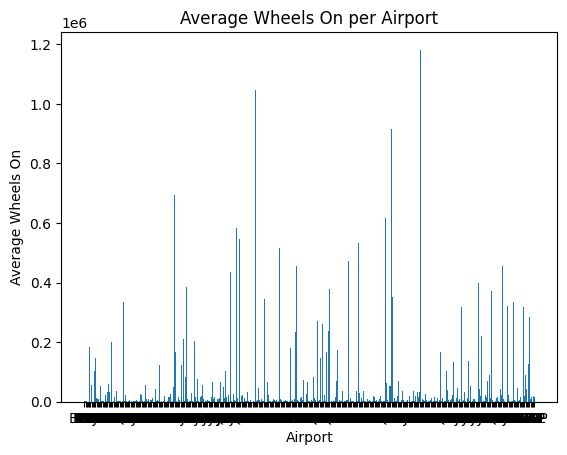

In [ ]:
# Calcola la somma di "Wheels_On" per ogni aeroporto
total_wheels_on = df.groupBy("Origin").agg({"WheelsOn": "sum"})

# Calcola la media di "Wheels_On" per ogni aeroporto
average_wheels_on = total_wheels_on.withColumn("avg_Wheels_On", col("sum(WheelsOn)") / (370))

# Converti il DataFrame di PySpark in un DataFrame di Pandas per il plotting
pandas_df = average_wheels_on.toPandas()

# Plotta il grafico a barre
plt.bar(pandas_df["Origin"], pandas_df["avg_Wheels_On"])
plt.xlabel("Airport")
plt.ylabel("Average Wheels On")
plt.title("Average Wheels On per Airport")
plt.show()

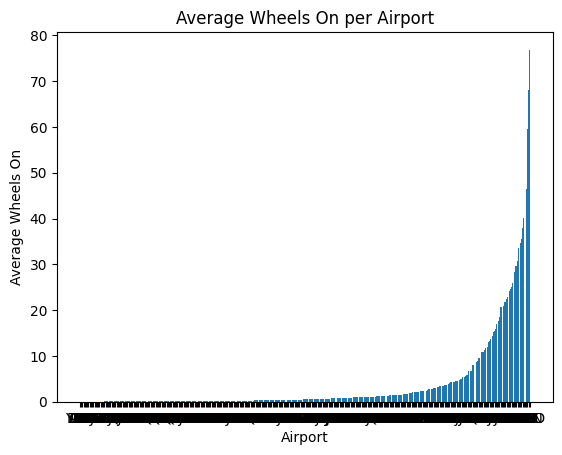

In [ ]:

# Calcola la somma di "Wheels_On" per ogni aeroporto
total_wheels_on = df.groupBy("Origin").agg({"WheelsOn": "sum"})

# Calcola la media di "Wheels_On" per ogni aeroporto
total_wheels_on = total_wheels_on.withColumnRenamed("sum(WheelsOn)", "total_Wheels_On")
average_wheels_on = total_wheels_on.withColumn("avg_Wheels_On", col("total_Wheels_On") / df.count())

# Ordina il DataFrame per la variabile "avg_Wheels_On" in ordine crescente
average_wheels_on = average_wheels_on.orderBy("avg_Wheels_On")

# Converti il DataFrame di PySpark in un DataFrame di Pandas per il plotting
pandas_df = average_wheels_on.toPandas()

# Plotta il grafico a barre
plt.bar(pandas_df["Origin"], pandas_df["avg_Wheels_On"])
plt.xlabel("Airport")
plt.ylabel("Average Wheels On")
plt.title("Average Wheels On per Airport")
plt.show()


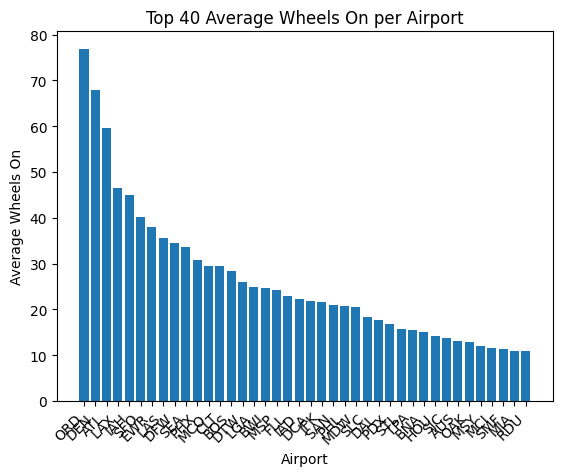

In [ ]:
# Calcola la somma di "Wheels_On" per ogni aeroporto
total_wheels_on = df.groupBy("Origin").agg({"WheelsOn": "sum"})

# Calcola la media di "Wheels_On" per ogni aeroporto
total_wheels_on = total_wheels_on.withColumnRenamed("sum(WheelsOn)", "total_Wheels_On")
average_wheels_on = total_wheels_on.withColumn("avg_Wheels_On", col("total_Wheels_On") / df.count())

# Ordina il DataFrame per la variabile "depdelay" in ordine decrescente
average_wheels_on = average_wheels_on.orderBy(col("avg_Wheels_On").desc())

# Seleziona i primi quaranta elementi
top_40_df = average_wheels_on.limit(40)

# Converti il DataFrame di PySpark in un DataFrame di Pandas per il plotting
pandas_df = top_40_df.toPandas()

# Plotta il grafico a barre
plt.bar(pandas_df["Origin"], pandas_df["avg_Wheels_On"])
plt.xlabel("Airport")
plt.ylabel("Average Wheels On")
plt.title("Top 40 Average Wheels On per Airport")
plt.xticks(rotation=45, ha="right")
plt.show()


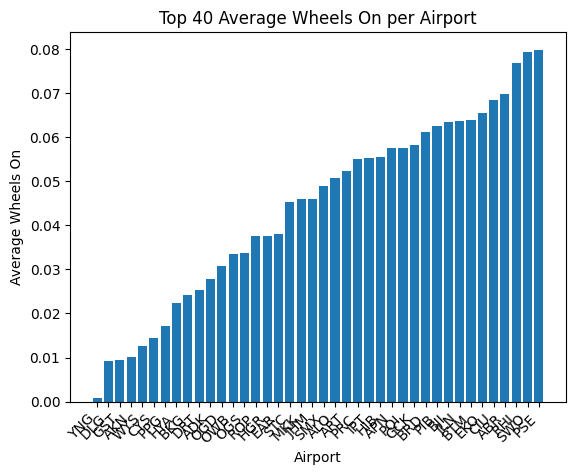

In [ ]:
# TOP AREOPORTI CON MINOR TEMPO DI WHEELS ON

# Calcola la somma di "Wheels_On" per ogni aeroporto
total_wheels_on = df.groupBy("Origin").agg({"WheelsOn": "sum"})

# Calcola la media di "Wheels_On" per ogni aeroporto
total_wheels_on = total_wheels_on.withColumnRenamed("sum(WheelsOn)", "total_Wheels_On")
average_wheels_on = total_wheels_on.withColumn("avg_Wheels_On", col("total_Wheels_On") / df.count())

# Ordina il DataFrame per la variabile "depdelay" in ordine decrescente
average_wheels_on = average_wheels_on.orderBy(col("avg_Wheels_On"))

# Seleziona i primi quaranta elementi
top_40_df = average_wheels_on.limit(40)

# Converti il DataFrame di PySpark in un DataFrame di Pandas per il plotting
pandas_df = top_40_df.toPandas()

# Plotta il grafico a barre
plt.bar(pandas_df["Origin"], pandas_df["avg_Wheels_On"])
plt.xlabel("Airport")
plt.ylabel("Average Wheels On")
plt.title("Top 40 Average Wheels On per Airport")
plt.xticks(rotation=45, ha="right")
plt.show()


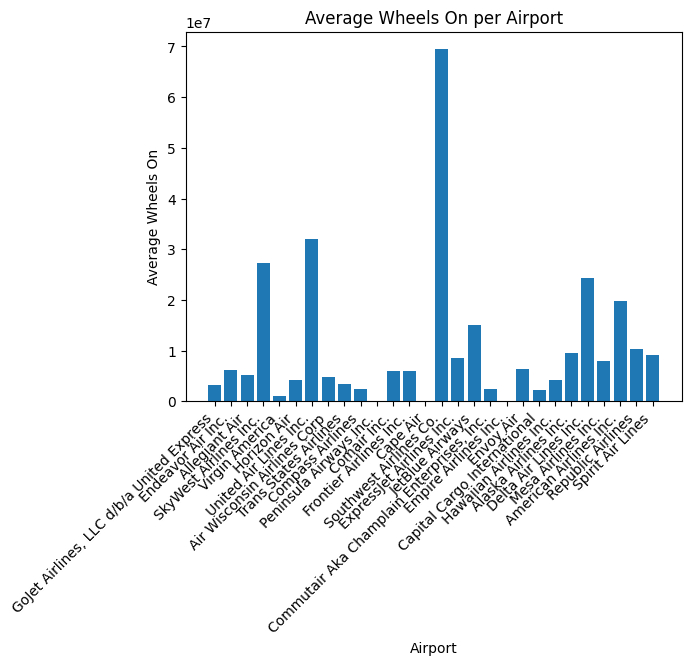

In [ ]:
# TEMPO MEDIO DI WHEELS ON RAGGRUPPATO PER AIRLINE

# Calcola la somma di "Wheels_On" per ogni aeroporto
total_wheels_on = df.groupBy("Airline").agg({"WheelsOn": "sum"})

# Calcola la media di "Wheels_On" per ogni aeroporto
average_wheels_on = total_wheels_on.withColumn("avg_Wheels_On", col("sum(WheelsOn)") / (28))

# Converti il DataFrame di PySpark in un DataFrame di Pandas per il plotting
pandas_df = average_wheels_on.toPandas()

# Plotta il grafico a barre
plt.bar(pandas_df["Airline"], pandas_df["avg_Wheels_On"])
plt.xlabel("Airport")
plt.ylabel("Average Wheels On")
plt.title("Average Wheels On per Airport")
plt.xticks(rotation=45, ha="right")
plt.show()

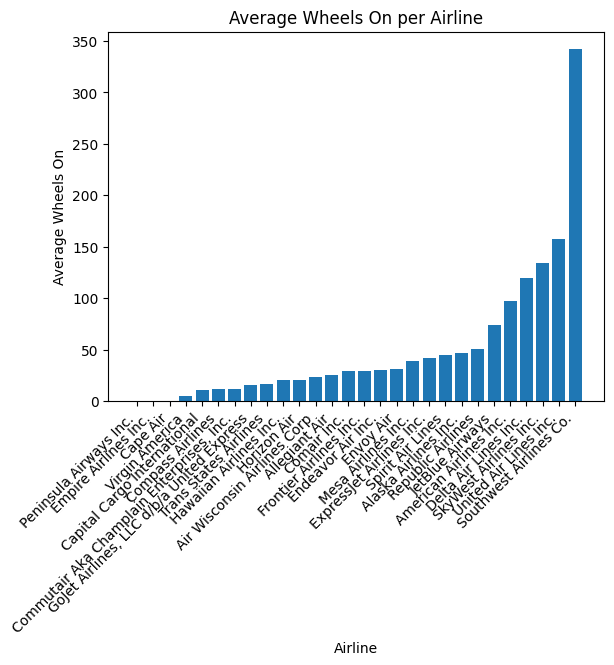

In [ ]:
# TEMPO MEDIO DI WHEELS ON RAGGRUPPATO PER AIRLINE E MESSO IN ORDINE CRESCENTE

# Calcola la somma di "Wheels_On" per ogni compagnia aerea
total_wheels_on = df.groupBy("Airline").agg({"WheelsOn": "sum"})

# Calcola la media di "Wheels_On" per ogni compagnia aerea
total_wheels_on = total_wheels_on.withColumnRenamed("sum(WheelsOn)", "total_Wheels_On")
average_wheels_on = total_wheels_on.withColumn("avg_Wheels_On", col("total_Wheels_On") / df.count())

# Ordina il DataFrame per la variabile "avg_Wheels_On" in ordine crescente
average_wheels_on = average_wheels_on.orderBy("avg_Wheels_On")

# Converti il DataFrame di PySpark in un DataFrame di Pandas per il plotting
pandas_df = average_wheels_on.toPandas()

# Plotta il grafico a barre
plt.bar(pandas_df["Airline"], pandas_df["avg_Wheels_On"])
plt.xlabel("Airline")
plt.ylabel("Average Wheels On")
plt.title("Average Wheels On per Airline")
plt.xticks(rotation=45, ha="right")
plt.show()


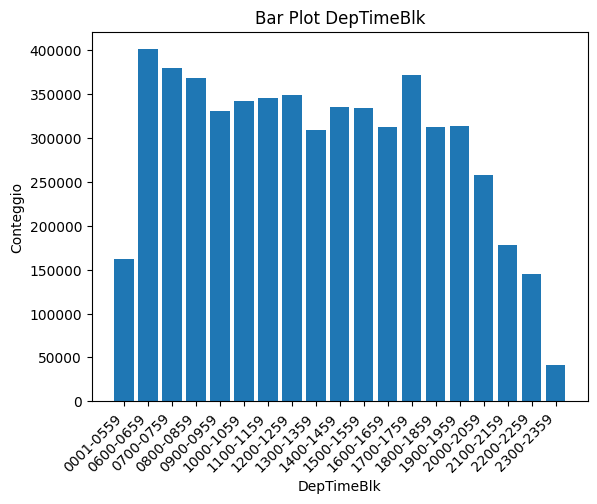

In [ ]:
conteggio_per_categoria = cleaned_df.groupBy("DepTimeBlk").count().toPandas()
conteggio_per_categoria = conteggio_per_categoria.sort_values(by='DepTimeBlk')

# Crea il bar plot utilizzando Matplotlib
plt.bar(conteggio_per_categoria['DepTimeBlk'], conteggio_per_categoria['count'])
plt.xlabel('DepTimeBlk')
plt.ylabel('Conteggio')
plt.title('Bar Plot DepTimeBlk')
plt.xticks(rotation=45, ha="right")
plt.show()

In [ ]:
# Calcola la somma di "Wheels_On" per ogni aeroporto
total_wheels_on = df.groupBy("Airline").agg({"WheelsOff": "sum"})

# Calcola la media di "Wheels_On" per ogni aeroporto
average_wheels_on = total_wheels_on.withColumn("avg_Wheels_On", col("sum(WheelsOn)") / (28))

# Converti il DataFrame di PySpark in un DataFrame di Pandas per il plotting
pandas_df = average_wheels_on.toPandas()

# Plotta il grafico a barre
plt.bar(pandas_df["Airline"], pandas_df["avg_Wheels_On"])
plt.xlabel("Airport")
plt.ylabel("Average Wheels On")
plt.title("Average Wheels On per Airport")
plt.xticks(rotation=45, ha="right")
plt.show()

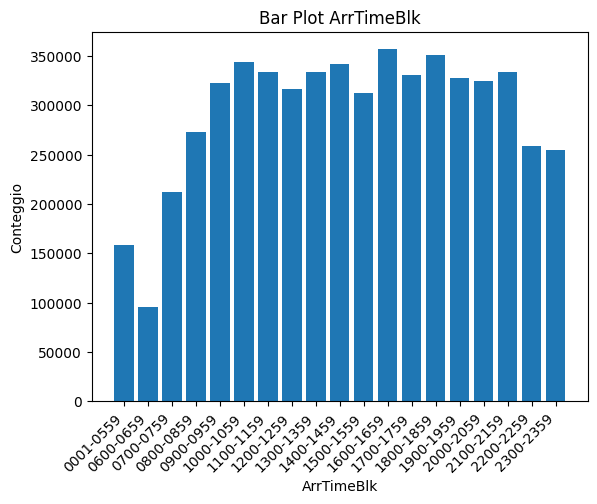

In [ ]:
conteggio_per_categoria = cleaned_df.groupBy("ArrTimeBlk").count().toPandas()
conteggio_per_categoria = conteggio_per_categoria.sort_values(by='ArrTimeBlk')

# Crea il bar plot utilizzando Matplotlib
plt.bar(conteggio_per_categoria['ArrTimeBlk'], conteggio_per_categoria['count'])
plt.xlabel('ArrTimeBlk')
plt.ylabel('Conteggio')
plt.title('Bar Plot ArrTimeBlk')
plt.xticks(rotation=45, ha="right")
plt.show()

## Correlation analysis

We progressivelly define some columns to drop in order to perform a correlation analysis

1. Columns to One-Encode:




 - Airline
 - Origin
 - Dest
 - Cancelled
 - Diverted
 - DayOfWeek - Marketing_Airline_Network
 - Operated_or_Branded_Code_Share_Partners
 -  Operating_Airline - Tail_Number
 - OriginCityName - OriginStateName
 -  DestStateName
 - DepTimeBlk
 - ArrTimeBlk
 - DepDel15

2. Columns already encoded:
- Month
- DayofMonth
- DayofWeek
- Flight_Number_Marketing_Airline
- Flight_Number_Operating_Airline
- OriginAirportID
- DestAirportID
- DepartureDelayGroups (CONTROLLARE VALORI NEGATIVI)
- ArrDel15
- ArrivalDelayGroups
- DistanceGroups
- DivAirportLandings


In [ ]:
corr_df=cleaned_df.drop("FlightDate","__index_level_0__","Airline", "Origin","Dest","Cancelled", "Diverted","Month","DayofMonth","DayofWeek","Marketing_Airline_Network","Operated_or_Branded_Code_Share_Partners","Flight_Number_Marketing_Airline", "Operating_Airline", "Tail_Number", "Flight_Number_Operating_Airline", "OriginAirportID","OriginCityName","OriginStateName","DestAirportID","DestCityName","DestStateName","DepDel15","DepartureDelayGroups","DepTimeBlk", "ArrivalDelayGroups","ArrTimeBlk","DistanceGroup","DivAirportLandings","ArrDel15")

In [ ]:
corr_df.show(50)

+--------+-------+--------------+-----------------+--------+--------+--------------------+-----------------+-----------------+-------------------+------------------+--------------------+
|DepDelay|AirTime|CRSElapsedTime|ActualElapsedTime|Distance|ArrDelay|CRSDepTime_InMinutes|DepTime_InMinutes|ArrTime_InMinutes|WheelsOff_InMinutes|WheelsOn_InMinutes|CRSArrTime_InMinutes|
+--------+-------+--------------+-----------------+--------+--------+--------------------+-----------------+-----------------+-------------------+------------------+--------------------+
|    -5.0|   38.0|          62.0|             59.0|   145.0|    -8.0|                 722|            717.0|            776.0|              731.0|             769.0|                 784|
|    -5.0|   36.0|          62.0|             61.0|   145.0|    -6.0|                 722|            717.0|            778.0|              730.0|             766.0|                 784|
|    -9.0|   40.0|          62.0|             69.0|   145.0|    -

# Plotting


>>> plotting distribution for DepDelay


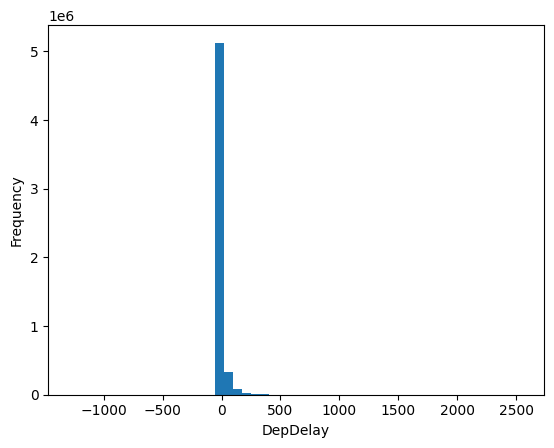

>>> plotting distribution for AirTime


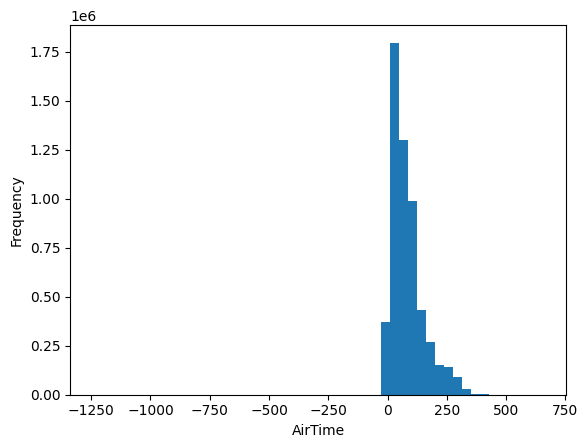

>>> plotting distribution for CRSElapsedTime


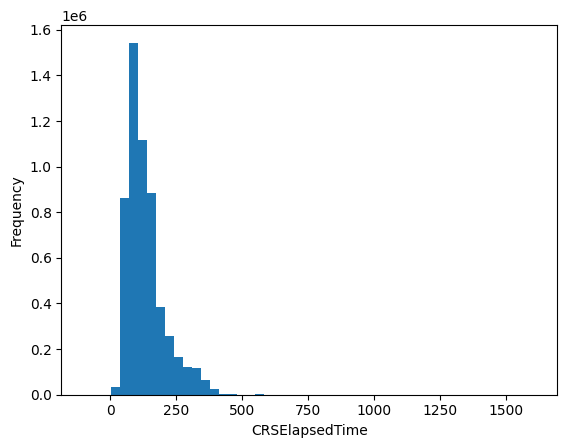

>>> plotting distribution for ActualElapsedTime


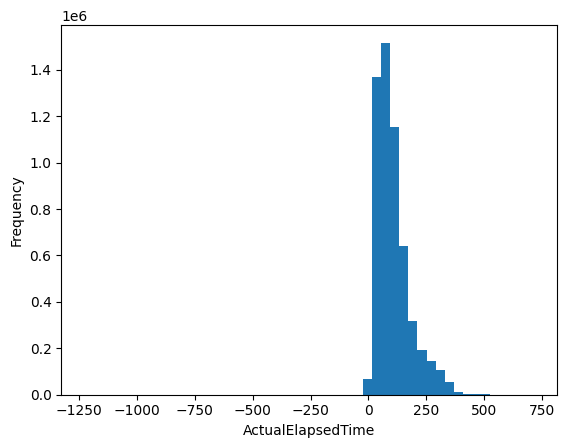

>>> plotting distribution for Distance


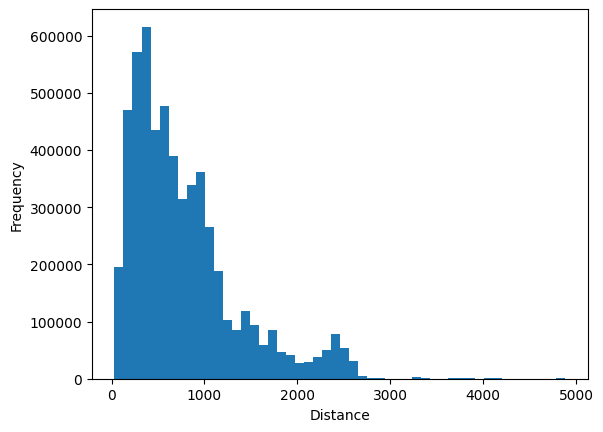

>>> plotting distribution for ArrDelay


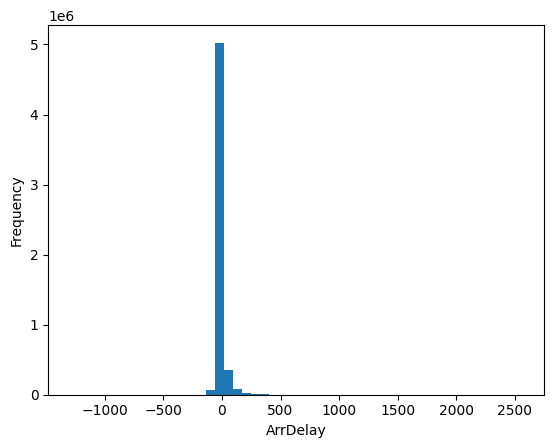

>>> plotting distribution for ArrDel15


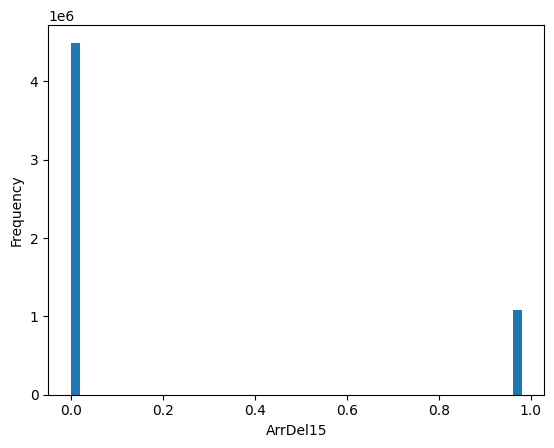

>>> plotting distribution for CRSDepTime_InMinutes


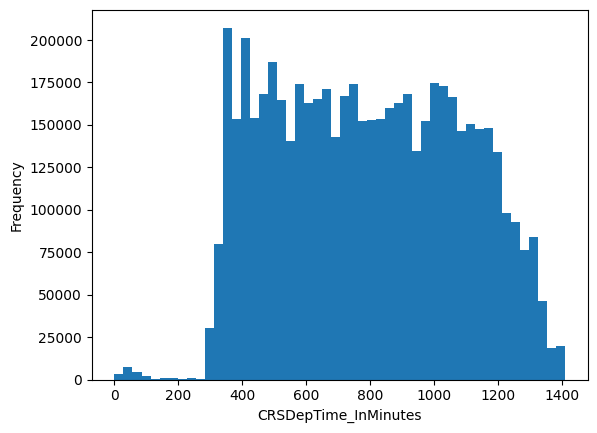

>>> plotting distribution for DepTime_InMinutes


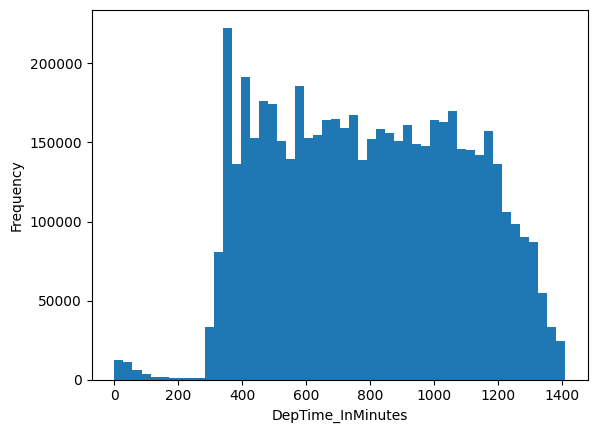

>>> plotting distribution for ArrTime_InMinutes


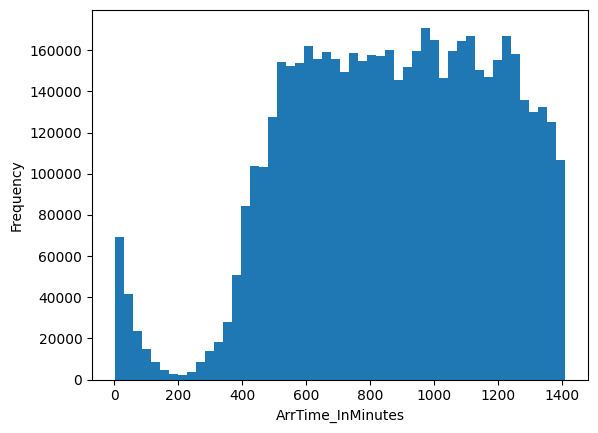

>>> plotting distribution for WheelsOff_InMinutes


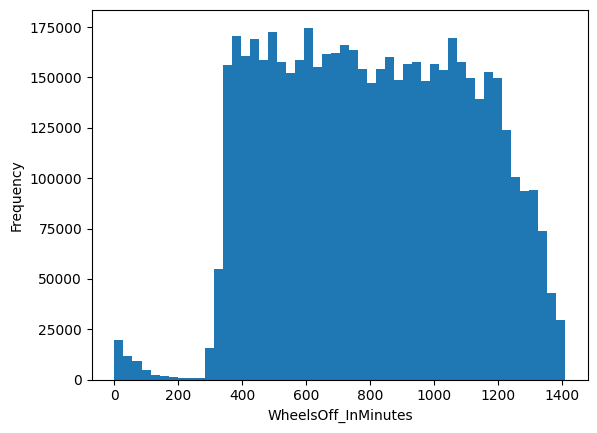

>>> plotting distribution for WheelsOn_InMinutes


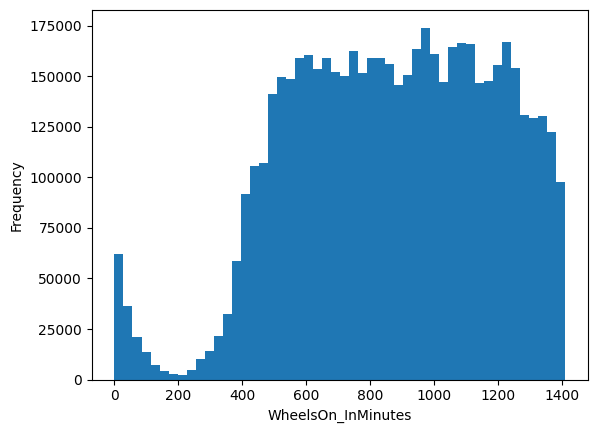

>>> plotting distribution for CRSArrTime_InMinutes


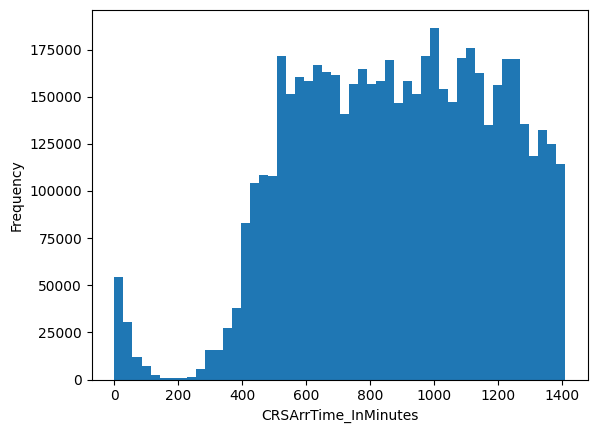

In [ ]:
%matplotlib inline

corr_df.createOrReplaceTempView("flight_corr")
query = sqlCtx.sql("Select Airtime from flight_corr")

xy_columns = ["DepDelay", "AirTime", "CRSElapsedTime", "ActualElapsedTime", "Distance", "ArrDelay", "ArrDel15", "CRSDepTime_InMinutes", "DepTime_InMinutes", "ArrTime_InMinutes", "WheelsOff_InMinutes", "WheelsOn_InMinutes", "CRSArrTime_InMinutes"]


for col in xy_columns:

    print(f">>> plotting distribution for {col}")

    query = sqlCtx.sql(f'Select Airtime, {col} from flight_corr')

    h = query.select(col).rdd.flatMap(lambda x: x).histogram(50)

    # Loading the Computed Histogram into a Pandas Dataframe for plotting
    dfh = pd.DataFrame(
        list(zip(*h)),
        columns=['bin', 'frequency']
    )

    bins = dfh['bin']
    counts = dfh['frequency']

    plt.hist(bins, len(bins), weights=counts)

    plt.xlabel(f'{col}', size=10)
    plt.ylabel("Frequency", size=10)
#     plt.title("Number of songs per mode", size=10)
    plt.show()

# Correlation

Since our Data Distribution seems to not be normal, we decided to Normalize our data.

In [ ]:
from pyspark.ml.linalg import DenseMatrix, Vectors
from pyspark.ml.stat import Correlation

In [ ]:
from pyspark.ml.feature import MinMaxScaler, VectorAssembler

In [ ]:
# Specifica le colonne da normalizzare
colonne_da_normalizzare = ["DepDelay", "AirTime", "CRSElapsedTime", "ActualElapsedTime", "Distance", "ArrDelay", "CRSDepTime_InMinutes", "DepTime_InMinutes", "ArrTime_InMinutes", "WheelsOff_InMinutes", "WheelsOn_InMinutes", "CRSArrTime_InMinutes"]

# Creazione dell'Assembler per creare una feature vector
assembler = VectorAssembler(inputCols=colonne_da_normalizzare, outputCol="features")

# Creazione del normalizzatore MinMax
scaler = MinMaxScaler(inputCol="features", outputCol="scaled_features")

# Creazione della pipeline
pipeline = Pipeline(stages=[assembler, scaler])

# Addestra il modello sulla pipeline
model = pipeline.fit(corr_df)

# Applica la normalizzazione al DataFrame
df_normalizzato = model.transform(corr_df)

# Seleziona solo le colonne rilevanti
df_normalizzato = df_normalizzato.select("scaled_features")

# Mostra il risultato
df_normalizzato.show(truncate=False)

+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|scaled_features                                                                                                                                                                                                                                |
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|[0.32650448143405886,0.6608247422680412,0.09231651376146789,0.6483627204030227,0.023021001615508886,0.326624203821656,0.5013908205841446,0.4975677553856845,0.5385684503127172,0.5072967338429465,0.5337039610840861,0.5441278665740097]       |
|[0.32650448143405886,0.65979381

In [ ]:
pearsonCorr = Correlation.corr(df_normalizzato, 'scaled_features', 'pearson').collect()[0][0]


In [ ]:
 #pearsonCorr = Correlation.corr(output_dataset, 'assemblerfeatures', 'pearson').collect()[0][0]
features = corr_df.schema.names
#trasformo la DenseMatrix in un array numpy
correlation_array = pearsonCorr.toArray() #ritorna un numpy.ndarray

correlationDF = pd.DataFrame(
    correlation_array,
    index = features,
    columns = features
)

correlationDF

,DepDelay,AirTime,CRSElapsedTime,ActualElapsedTime,Distance,ArrDelay,CRSDepTime_InMinutes,DepTime_InMinutes,ArrTime_InMinutes,WheelsOff_InMinutes,WheelsOn_InMinutes,CRSArrTime_InMinutes
DepDelay,1.000000,0.009899,0.013788,0.018567,0.010119,0.959351,0.104607,0.138782,0.029863,0.129731,0.037051,0.088889
AirTime,0.009899,1.000000,0.987583,0.987302,0.984355,0.000134,-0.017753,-0.022116,0.014071,-0.030005,0.017212,0.020495
CRSElapsedTime,0.013788,0.987583,1.000000,0.981189,0.981033,-0.018860,-0.018418,-0.022471,0.015055,-0.029504,0.017783,0.023055
ActualElapsedTime,0.018567,0.987302,0.981189,1.000000,0.969253,0.037630,-0.021348,-0.023966,0.017161,-0.027935,0.020132,0.022276
Distance,0.010119,0.984355,0.981033,0.969253,1.000000,-0.017081,-0.010471,-0.016927,0.009723,-0.027381,0.013448,0.018089
ArrDelay,0.959351,0.000134,-0.018860,0.037630,-0.017081,1.000000,0.095696,0.130443,0.031865,0.126572,0.039082,0.083640
CRSDepTime_InMinutes,0.104607,-0.017753,-0.018418,-0.021348,-0.010471,0.095696,1.000000,0.959396,0.605983,0.933621,0.632953,0.683769
DepTime_InMinutes,0.138782,-0.022116,-0.022471,-0.023966,-0.016927,0.130443,0.959396,1.000000,0.628594,0.972039,0.656448,0.685991
ArrTime_InMinutes,0.029863,0.014071,0.015055,0.017161,0.009723,0.031865,0.605983,0.628594,1.000000,0.649091,0.967416,0.850437
WheelsOff_InMinutes,0.129731,-0.030005,-0.029504,-0.027935,-0.027381,0.126572,0.933621,0.972039,0.649091,1.000000,0.677141,0.695987


<Axes: >

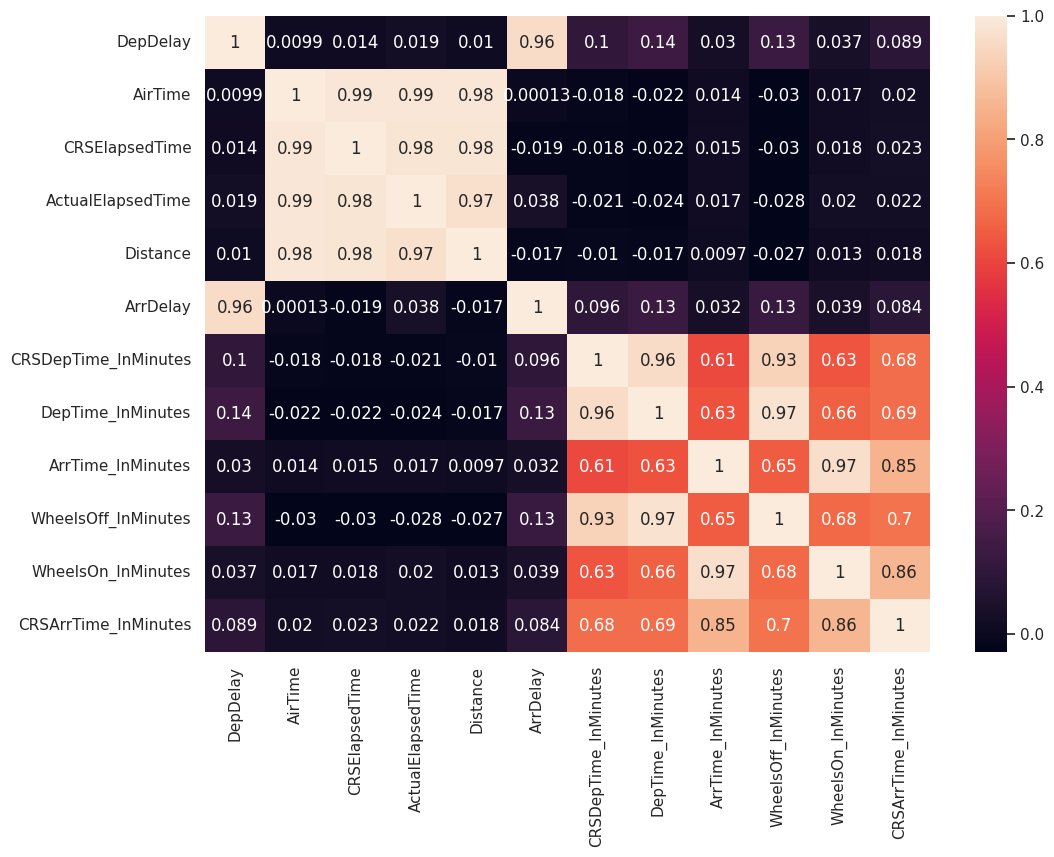

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(correlationDF, annot=True)

##Colonne normalizzate da droppare e motivazione:



-   CRSElapsedTime: è identico a AirTime
-   ActualElapsedTime: è identico ad Airtime
- CRSdepTime_inMinutes: è identico a DepTime_ InMinutes
- WheelsOff_in minutes: è identico Deptime_inMinutes
- WheelsOn_inMinutes: è identico a Arrtime_inMinutes
- CRSArrTime_InMinutes: è identico a Arrtime_inMinutes



#Colonne normalizzate da mantenere
- AirTime
- DepTime_inMinutes
- Arrtime_inMinutes
- Distance
- DepDelay
- ArrDelay



In [ ]:
cleaned_df = cleaned_df.withColumn("Season", when((col("Month") == 12) | (col("Month") == 1 ) | (col("Month") == 2 ), "Inverno")
  .when((col("Month") >= 3) & (col("Month") <= 5), "Primavera")
  .when((col("Month") >= 6) & (col("Month") <= 8), "Estate")
  .when((col("Month") >= 9) & (col("Month") <= 11), "Autunno")
  .otherwise("Invalid Month"))

cleaned_df.show()


+----------+-----------------+------+----+---------+--------+--------+-------+--------------+-----------------+--------+-----+----------+---------+-------------------------+---------------------------------------+-------------------------------+-----------------+-----------+-------------------------------+---------------+--------------+---------------+-------------+------------+-------------+--------+--------------------+----------+--------+--------+------------------+----------+-------------+------------------+--------------------+-----------------+-----------------+-------------------+------------------+--------------------+-------+
|FlightDate|          Airline|Origin|Dest|Cancelled|Diverted|DepDelay|AirTime|CRSElapsedTime|ActualElapsedTime|Distance|Month|DayofMonth|DayOfWeek|Marketing_Airline_Network|Operated_or_Branded_Code_Share_Partners|Flight_Number_Marketing_Airline|Operating_Airline|Tail_Number|Flight_Number_Operating_Airline|OriginAirportID|OriginCityName|OriginStateName|Des

In [ ]:
cleaned_df.select("Season").distinct().count()

4

In [ ]:
from pyspark.sql.functions import col, udf
from pyspark.sql.types import DoubleType, ArrayType

# Definisci una funzione UDF per convertire VectorUDT in ArrayType
vector_to_array_udf = udf(lambda v: v.toArray().tolist(), ArrayType(DoubleType()))

# Applica la funzione UDF alla colonna "scaled_features"
df_norm_col = df_normalizzato.withColumn("scaled_features_array", vector_to_array_udf("scaled_features"))

# Estrai ogni singola colonna dalla colonna normalizzata
for i, col_name in enumerate(colonne_da_normalizzare):
    df_norm_col = df_norm_col.withColumn(f"{col_name}", col("scaled_features_array")[i])

# Rimuovi le colonne temporanee
df_norm_col = df_norm_col.drop("scaled_features", "scaled_features_array")

# Mostra il risultato
df_norm_col.show(truncate=False)

+-------------------+------------------+-------------------+------------------+--------------------+-------------------+--------------------+-------------------+-------------------+-------------------+-------------------+--------------------+
|DepDelay           |AirTime           |CRSElapsedTime     |ActualElapsedTime |Distance            |ArrDelay           |CRSDepTime_InMinutes|DepTime_InMinutes  |ArrTime_InMinutes  |WheelsOff_InMinutes|WheelsOn_InMinutes |CRSArrTime_InMinutes|
+-------------------+------------------+-------------------+------------------+--------------------+-------------------+--------------------+-------------------+-------------------+-------------------+-------------------+--------------------+
|0.32650448143405886|0.6608247422680412|0.09231651376146789|0.6483627204030227|0.023021001615508886|0.326624203821656  |0.5013908205841446  |0.4975677553856845 |0.5385684503127172 |0.5072967338429465 |0.5337039610840861 |0.5441278665740097  |
|0.32650448143405886|0.65979

In [ ]:
df_norm_col = df_norm_col.withColumnRenamed("CRSDepTime_InMinutes", "CRSDepTime")
df_norm_col = df_norm_col.withColumnRenamed("DepTime_InMinutes", "DepTime")
df_norm_col = df_norm_col.withColumnRenamed("ArrTime_InMinutes", "ArrTime")
df_norm_col = df_norm_col.withColumnRenamed("WheelsOff_InMinutes", "WheelsOff")
df_norm_col = df_norm_col.withColumnRenamed("WheelsOn_InMinutes", "WheelsOn")
df_norm_col = df_norm_col.withColumnRenamed("CRSArrTime_InMinutes", "CRSArrTime")

In [ ]:
df_norm_col.show(10)

+-------------------+------------------+-------------------+------------------+--------------------+-------------------+------------------+------------------+-------------------+-------------------+-------------------+-------------------+
|           DepDelay|           AirTime|     CRSElapsedTime| ActualElapsedTime|            Distance|           ArrDelay|        CRSDepTimE|           DepTime|            ArrTime|          WheelsOff|           WheelsOn|         CRSArrTime|
+-------------------+------------------+-------------------+------------------+--------------------+-------------------+------------------+------------------+-------------------+-------------------+-------------------+-------------------+
|0.32650448143405886|0.6608247422680412|0.09231651376146789|0.6483627204030227|0.023021001615508886|  0.326624203821656|0.5013908205841446|0.4975677553856845| 0.5385684503127172| 0.5072967338429465| 0.5337039610840861| 0.5441278665740097|
|0.32650448143405886|0.6597938144329897|0.09

## JOINING BETWEEN DATAFRAME

In [ ]:
# Unisci i DataFrame sulla base delle colonne comuni

df_definitivo = cleaned_df.join(df_norm_col, [ "DepTime", "ArrTime", "WheelsOff", "WheelsOn", "CRSArrTime","DepDelay","AirTime", "CRSElapsedTime", "ActualElapsedTime","Distance","ArrDelay"], "left_outer")

# Mostra il risultatodf_definitivo.show(truncate=False)

AnalysisException: ignored

## PROVA TIME SERIES

In [ ]:
df_time = df.withColumn("FlightDate", col("FlightDate").cast("timestamp"))

# Ordina il DataFrame in base alla colonna della data
df_time = df_time.orderBy("FlightDate")

# Mostra il DataFrame risultante
df_time.show()

+-------------------+-----------------+------+----+---------+--------+----------+-------+--------+-------+-------+--------------+-----------------+--------+-----+----------+---------+-------------------------+---------------------------------------+-------------------------------+-----------------+-----------+-------------------------------+---------------+--------------------+---------------+-------------+--------------------+--------------+--------+--------------------+----------+---------+--------+----------+--------+--------+------------------+----------+-------------+------------------+-----------------+
|         FlightDate|          Airline|Origin|Dest|Cancelled|Diverted|CRSDepTime|DepTime|DepDelay|ArrTime|AirTime|CRSElapsedTime|ActualElapsedTime|Distance|Month|DayofMonth|DayOfWeek|Marketing_Airline_Network|Operated_or_Branded_Code_Share_Partners|Flight_Number_Marketing_Airline|Operating_Airline|Tail_Number|Flight_Number_Operating_Airline|OriginAirportID|      OriginCityName|Ori

In [ ]:
df = cleaned_df.withColumn("FlightDate", col("FlightDate").cast("timestamp"))

# Ordina il DataFrame in base alla colonna della data
df = df.orderBy("FlightDate")

# Converti il DataFrame Spark in un DataFrame Pandas per la visualizzazione
pandas_df = df.toPandas()

# Visualizza il plot
plt.figure(figsize=(12, 6))
plt.plot(pandas_df["FlightDate"], pandas_df["Flight_Number_Operating_Airline"], marker='o', linestyle='-')
plt.title("Time Series Plot")
plt.xlabel("Flight Date")
plt.ylabel("Flight Number Operating Airline")
plt.grid(True)
plt.show()

Py4JJavaError: ignored